In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# reading the CSV file
advertising_data = pd.read_csv("./advertising.csv")

In [3]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# checking for null values in any columns
advertising_data.isnull().sum()

# no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
advertising_data.info()
# all columns datatype are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
# getting the mean, median of the data
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### visualizing the data

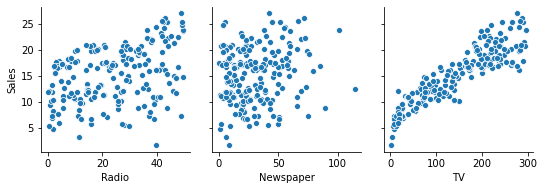

In [10]:
# plotting the pairplot of Sales (depandent variable) with indepandent variable
sns.pairplot(advertising_data, x_vars=['Radio', 'Newspaper', 'TV'], y_vars=['Sales'])


clearly we can see some sort of relationship between the price and other indepandent variable
Sales is most linearly related to TV

Creating the simple LR model with Sales and TV

In [12]:
# let split the data to train and test data
train_data, test_data = train_test_split(advertising_data, train_size=0.7, test_size=0.3, random_state=100)

In [13]:
# checking the size of train_data and test_data
print(test_data.shape)
print(train_data.shape)

(60, 4)
(140, 4)


In [15]:
X_train = train_data['TV']
y_train = train_data['Sales']

In [16]:
# since X_train is a series, and to use it to predict y values we need to add a constant to it
X_train_sm = sm.add_constant(X_train)

C:\Users\MAHAJAN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [21]:
# creating an object of OLS ordinary least square class
lr = sm.OLS(y_train, X_train_sm)

In [22]:
# calling the fit() to calculate the coefficients
lr_model = lr.fit()

In [35]:
# viewing the values of coefficients
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [29]:
# we can also predict the value using the eq 6.9 + 0.05X
y_pred = 6.9 + 0.05*X_train

In [36]:
y_pred.head()

74     17.570
3      14.475
185    17.150
26     14.045
90     13.615
Name: TV, dtype: float64

In [38]:
# viewing the summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        23:07:01   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### inference from summary
p-value for TV is 0.00 so this feature is significant
R2-squared value is 0.816 that means 81.6% of variance in the sales data can be explained by this variable
prob F-statis is very low that means the mode is significant

coeff of feature TV is positive that means the sales will increase with increase in the per unit value of TV

In [28]:
# predicting the y values for tain_data
y_train_pred = lr_model.predict(X_train_sm)

In [31]:
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

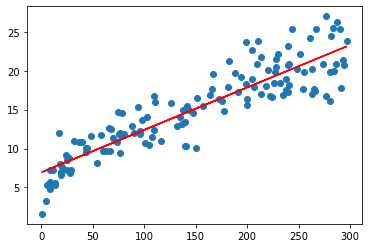

In [34]:
# plotting the actual y values and predicted y values for X
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [42]:
# now calculating the residuals
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_train

0.8157933136480389

In [43]:
# now predicting the values on the test data
X_test = test_data['TV']
y_test = test_data['Sales']

In [45]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [51]:
y_test_predict = lr_model.predict(X_test_sm)

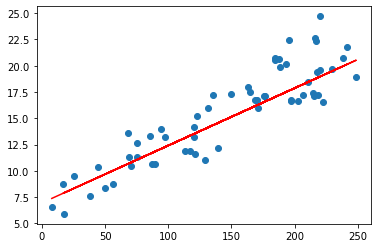

In [52]:
# plotting the y_test and y_test_pred for X_test values
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_predict, 'r')
plt.show()

In [53]:
# calculating the residuals on test data
r2_score_test = r2_score(y_test, y_test_predict)
r2_score_test

0.7921031601245658

### inference of r2_score of test and train data
r2_score of train data is 0.816 and r2_score of test data is 0.79 there is much difference so the model is significant

## now considering the second indepandent variable NewsPaper

In [54]:
X_train = train_data['Newspaper']
y_train = train_data['Sales']

#adding constant to X_train
X_train_sm = sm.add_constant(X_train)

# creating the object of OLS
lr = sm.OLS(y_train, X_train_sm)
lrmodel2 = lr.fit()

C:\Users\MAHAJAN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
lrmodel2.params

const        13.132714
Newspaper     0.059574
dtype: float64

In [56]:
lrmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Tue, 14 Apr 2020   Prob (F-statistic):            0.00423
Time:                        23:23:00   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1327      0.792     16.574      0.000      11.566      14.699
Newspaper      0.0596      0.020      2.909      0.004       0.019       0.100
==============================================================================
Omnibus:                        9.229   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.890
Skew:                          -0.073   Prob(JB):                        0.143
Kurtosis:                       2.196   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### inference from the summary
R-squared is low as compared to the r-squared value of model1
prob F-stats is high as compared to model1

In [57]:
# predicting the test and train values
y_train_pred = lrmodel2.predict(X_train_sm)

X_test = test_data['Newspaper']
y_test = test_data['Sales']

X_test_sm = sm.add_constant(X_test)

y_test_pred = lrmodel2.predict(X_test_sm)

In [60]:
# calculating the residuals 
r2_score_test = r2_score(y_test, y_test_pred)
r2_score_train = r2_score(y_train, y_train_pred)

In [61]:
print("r2_Score for train data %s" % r2_score_train)
print("r2_Score for test data %s" % r2_score_test)


r2_Score for train data 0.057771051068960966
r2_Score for test data -0.1445736328993592


### considering the third featue Radio

In [63]:
X_train = train_data['Radio']
y_train = train_data['Sales']

X_test = test_data['Radio']
y_test = test_data['Sales']

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

lr = sm.OLS(y_train, X_train_sm)
lrmodel3 = lr.fit()

C:\Users\MAHAJAN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
lrmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           5.36e-05
Time:                        23:38:41   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.000      10.552      13.777
Radio          0.1239      0.030      4.169      0.000       0.065       0.183
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.526
Skew:                          -0.384   Prob(JB):                       0.0383
Kurtosis:                       2.273   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# predicting the values
y_train_pred = lrmodel3.predict(X_train_sm)
y_test_pred = lrmodel3.predict(X_test_sm)

In [66]:
# residuals score
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

In [67]:
print("r2_Score for train data %s" % r2_score_train)
print("r2_Score for test data %s" % r2_score_test)

r2_Score for train data 0.11188119510677019
r2_Score for test data 0.15413341545839598
